## FRB Host Galaxy Property Analysis

This notebook compares fast radio burst (FRB) host galaxy properties using data from Heintz+2020 and Bhandari+2021. Both papers use a SED modeling code called CIGALE to derive the values using photometry obtained from several telescopes.

We will be making a plot of the stellar mass.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading in data
H20 = pd.read_csv('Heintz20_Data.csv')
B21 = pd.read_csv('Bhandari21.csv')

In [3]:
# lets see what this dataframe looks like
H20

,FRB_host,z_host,Mr,Mr_err,Mu-Mr,Mu-Mr_err,M_star,M_star_err,SFR,SFR_err,Age,Metallicity,Metallicity_upp_err,Metallicity_low_err,Offset,Offset_err,R_eff,R_eff_err
0,121102,0.1927,-16.20,0.08,1.49,0.18,0.14,0.07,0.15,0.04,0.26,8.08,NaN,NaN,0.6,0.3,0.7,0.1
1,180916,0.0337,-19.46,0.05,1.53,0.06,2.15,0.33,0.06,0.02,0.15,NaN,NaN,NaN,5.5,0.1,3.6,0.4
2,180924,0.3212,-20.81,0.05,1.78,0.15,13.20,5.10,0.88,0.26,0.38,8.93,0.02,0.02,3.4,0.5,2.7,0.1
3,181112,0.4755,-20.40,0.07,1.12,0.15,3.98,2.02,0.37,0.11,0.57,8.86,0.10,0.13,1.7,19.2,7.2,1.7
4,190102,0.2912,-19.85,0.06,1.40,0.12,3.39,1.02,0.86,0.26,0.06,8.70,0.07,0.08,2.0,2.2,4.4,0.5
5,190523,0.6600,-22.06,0.12,1.92,0.19,61.20,40.10,0.09,NaN,0.69,NaN,NaN,NaN,27.0,23.0,3.3,0.2
6,190608,0.1178,-21.22,0.05,1.40,0.09,11.60,2.80,0.69,0.21,0.38,8.85,0.02,0.02,6.6,0.6,2.8,0.2
7,190611,0.3778,NaN,NaN,NaN,NaN,0.80,NaN,0.27,0.08,NaN,8.71,0.17,0.28,11.0,4.0,2.1,0.1
8,190711,0.5220,-19.01,0.08,0.95,0.16,0.81,0.29,0.42,0.12,0.61,NaN,NaN,NaN,3.2,2.1,2.9,0.2
9,190714,0.2365,-19.92,0.05,1.19,0.17,14.90,7.10,0.65,0.65,1.59,9.03,0.04,0.04,1.9,1.1,3.9,0.1


In [4]:
# lets see what this dataframe looks like
B21

,FRB,z,Repeater,Offset,Offset_err,Reff,Reff_err,Mass,Mass_poserr,Mass_negerr,SFR,SFR_poserr,SFR_negerr,log_sSFR,Mr,Mr_err,u-r,u-r_err,Metallicity
0,121102,0.1927,y,0.8,0.1,0.66,0.03,0.01,0.01,0.01,0.15,0.04,0.04,-8.99,-16.20,0.08,1.49,0.18,8.08
1,180301,0.3304,y,10.8,3.0,5.80,0.20,0.23,0.06,0.06,1.93,0.58,0.58,-9.08,-20.18,0.07,0.90,0.11,8.70
2,180916,0.0337,y,5.4,0.0,3.57,0.36,0.22,0.03,0.03,0.06,0.02,0.02,-10.58,-19.46,0.05,1.53,0.06,NaN
3,180924,0.3212,n,3.4,0.8,2.75,0.10,1.32,0.51,0.51,0.88,0.26,0.26,-10.18,-20.81,0.05,1.78,0.15,8.93
4,190102,0.2912,n,2.3,4.2,4.43,0.51,0.47,0.54,0.54,0.86,0.26,0.26,-9.74,-19.87,0.06,1.44,0.15,8.70
5,190608,0.1178,n,6.5,0.8,2.84,0.23,1.16,0.28,0.28,0.69,0.21,0.21,-10.22,-21.22,0.05,1.40,0.09,8.85
6,190611,0.3778,n,11.7,5.8,2.15,0.11,0.35,0.70,0.70,0.27,0.08,0.08,-10.11,-19.29,0.10,1.29,0.18,8.71
7,190711,0.5220,y,1.6,4.5,2.94,0.17,0.08,0.03,0.03,0.42,0.12,0.12,-9.29,-19.01,0.08,0.95,0.16,NaN
8,190714,0.2365,n,2.7,1.8,3.94,0.05,1.42,0.55,0.55,0.65,0.20,0.20,-10.34,-20.37,0.05,1.51,0.28,9.03
9,191001,0.2340,n,11.1,0.8,5.55,0.03,4.64,1.88,1.88,8.06,2.42,2.42,-9.76,-22.13,0.05,1.67,0.19,8.94


As these papers don't include the same sample of FRBs, let's create some new dataframes for each property we want to plot that include the same FRBs.

In [12]:
# dropping FRBs only in Heintz+2020
H20_match = H20.drop(index=[3,5]) # drop 181112, 190523

# dropping FRBs only in Bhandari+2021
B21_match = B21.drop(index=[1, 10, 12, 13, 14, 15]) # drop 180301, 191228, 200906, 171020, 200120, 201124

Now pull out the quantities of interest

In [16]:
H20_Mass = H20_match['M_star'] #/10^9 MSun
H20_Mass_err = H20_match['M_star_err'] #/10^9 Msun

H20_SFR = H20_match['SFR'] # Msun/yr
H20_SFR_err = H20_match['SFR_err'] # Msun/yr

B21_Mass = B21_match['Mass'] #/10^10 Msun
B21_Mass_up = B21_match['Mass_poserr'] #/10^10 MSun
B21_Mass_low = B21_match['Mass_negerr'] #/10^10 MSun

B21_SFR = B21_match['SFR'] # Msun/yr
B21_SFR_up = B21_match['SFR_poserr'] # Msun/yr, symmetric error
B21_SFR_low = B21_match['SFR_negerr'] # Msun/yr, symmetric error

As you can see in the comments in the cells above, the units on the masses are different. Lets convert them to the same scale and into lists for the next section.

In [17]:
H20_Mass = np.array(H20_Mass)*10e9
H20_Mass = list(H20_Mass)
H20_Mass_err = np.array(H20_Mass_err)*10e9
H20_Mass_err = list(H20_Mass_err)

B21_Mass = np.array(B21_Mass)*10e10
B21_Mass = list(B21_Mass)
B21_Mass_err = np.array(B21_Mass_low)*10e10 # choose one array since the errors are symmetric
B21_Mass_err = list(B21_Mass_err)

For plotting purposes, it's easier to compare in log space. The cell below logs the median mass value (straightforward) and the errors in mass (not as straightforward).

In [18]:
H20_Mass_logged = []
for i in H20_Mass:
    val = np.log10(i)
    H20_Mass_logged.append(val)

H20_Mass_logged_err = []
for i, j in zip(H20_Mass, H20_Mass_err):
    summed = i + j
    val1 = np.log10(summed)
    val = np.log10(i)
    err = val1 - val
    H20_Mass_logged_err.append(err)

B21_Mass_logged = []
for i in B21_Mass:
    val = np.log10(i)
    B21_Mass_logged.append(val)

B21_Mass_logged_err = []
for i, j in zip(B21_Mass, B21_Mass_err):
    summed = i + j
    val1 = np.log10(summed)
    val = np.log10(i)
    err = val1 - val
    B21_Mass_logged_err.append(err)

Now, let's plot the results as a cumulative distribution function (CDF). This code was adapted from Anya Nugent.

Text(10.75, 9.9, '200430')

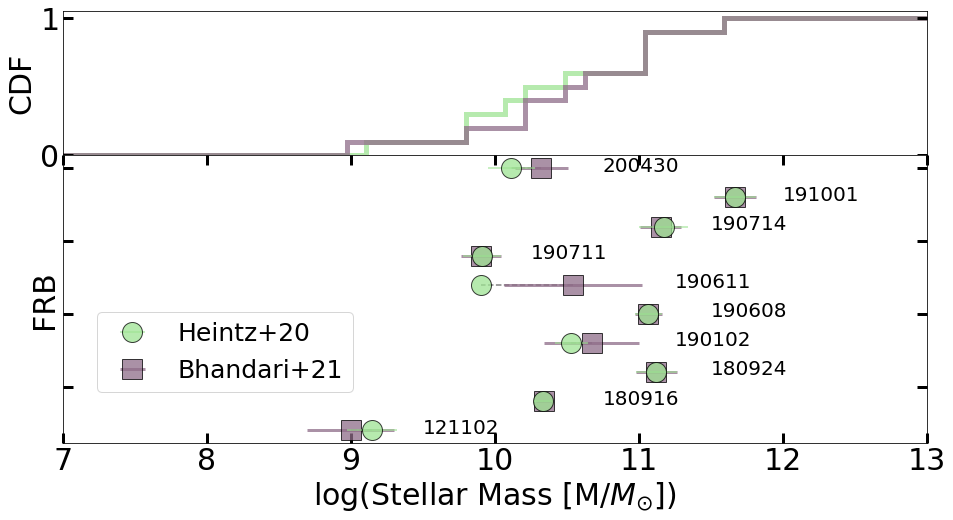

In [19]:
# Stellar mass comparison

# change default matplotlib settings
plt.rcParams['xtick.labelbottom'] = True

# initialize figure and axes
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.2], xlim=(7,13), xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], xlim=(7,13))

# plot the CDFs in the top panel
ax1.hist(H20_Mass_logged, bins=100, range=(0, 13.8), density=True, histtype='step', cumulative=True, 
         color='#9EE493', linewidth=5, zorder=1, alpha=0.75, label='Heintz+20')
ax1.hist(B21_Mass_logged, bins=100, range=(0, 13.8), density=True, histtype='step', cumulative=True,
         color='#8E6C88', linewidth=5, zorder=1, alpha=0.75, label='Bhandari+21')

# connect the FRBs
FRBs= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(10):
    x = [FRBs[i],FRBs[i]]
    y = [B21_Mass_logged[i],H20_Mass_logged[i]]
    ax2.plot(y,x,'grey', linestyle='--', zorder=0)

# plot the FRB values in the bottom panel
ax2.errorbar(H20_Mass_logged, FRBs, xerr=H20_Mass_logged_err, marker='o', markersize=20, alpha=0.75, 
             c='#9EE493', zorder=6, label='Heintz+20', markeredgecolor='k', linestyle='None')
ax2.errorbar(B21_Mass_logged, FRBs, xerr=B21_Mass_logged_err, marker = "s", markersize=20, 
             alpha=0.75, c='#8E6C88', zorder=5, label='Bhandari+21', markeredgecolor='k', elinewidth=3, 
             linestyle='None')


# figure aesthetics
ax2.legend(bbox_to_anchor=(0.35, 0.5), fontsize = 25)

ax1.set_ylabel('CDF', fontsize=30)
ax2.set_ylabel('FRB', fontsize=30)
ax2.set_xlabel('log(Stellar Mass [M/$M_{\odot}$])', fontsize = 30)

ax1.tick_params(width=3, length=10, bottom = True, top = True, left = True, right = True, direction='in', axis='y', labelsize=30)
ax2.tick_params(width=3, length=10,  bottom = True, top = True, left = True, right = True, direction='in', labelleft=False, labelsize=30)

# annotate to denote the FRBs
ax2.text(9.5, 0.9, '121102', fontsize=20)
ax2.text(10.75, 1.9, '180916', fontsize=20)
ax2.text(11.5, 2.9, '180924', fontsize=20)
ax2.text(11.25, 3.9, '190102', fontsize=20)
ax2.text(11.5, 4.9, '190608', fontsize=20)
ax2.text(11.25, 5.9, '190611', fontsize=20)
ax2.text(10.25, 6.9, '190711', fontsize=20)
ax2.text(11.5, 7.9, '190714', fontsize=20)
ax2.text(12,  8.9, '191001', fontsize=20)
ax2.text(10.75, 9.9, '200430', fontsize=20)

This isn't the most interesting plot, because Bhandari+2021 only updated a few of the measurements from Heintz+2020. Ongoing work of mine (Gordon+2022 in prep.) revises these values, but as those data are not published yet, I can't include them here. 